# ANALISIS EXPLORATORIO
instalamos librerias primero para poder realizar el analisis y obtencion de datos.
```pip install mysql-connector-python pandas matplotlib seaborn```

In [20]:
import pandas as pd
import mysql.connector

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos
consulta = """
SELECT id_orden, fecha_compra, id_cliente, genero_cliente, edad_cliente, 
       categoria_producto, nombre_producto, precio_producto, cantidad_comprada, 
       total_orden, metodo_pago, region_envio
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Verificar los primeros registros
df.head()


,id_orden,fecha_compra,id_cliente,genero_cliente,edad_cliente,categoria_producto,nombre_producto,precio_producto,cantidad_comprada,total_orden,metodo_pago,region_envio
0,1,2023-07-23,103,Femenino,76,Ropa,Chaqueta,150.97,2,301.94,Efectivo,Centro
1,2,2020-07-23,436,Masculino,49,Accesorios,Reloj,157.99,3,473.97,Efectivo,Norte
2,3,2029-07-23,861,Masculino,38,Accesorios,Gorro,81.20,1,81.20,PayPal,Centro
3,4,2021-11-23,271,Femenino,57,Calzado,Pantuflas,155.28,5,776.40,Efectivo,Oeste
4,5,2012-02-23,107,Femenino,45,Ropa,Camiseta,11.24,2,22.48,Tarjeta de crédito,Centro



## Calcular estadísticas básicas (media, mediana, moda) para las variables numéricas

Calculamos la media, mediana y moda de las columnas del dataframe que son de tipo numerico de la siguiente forma:

In [21]:
# Calcular estadísticas básicas
media_precio = df['precio_producto'].mean()
mediana_precio = df['precio_producto'].median()
moda_precio = df['precio_producto'].mode()[0]

media_edad = df['edad_cliente'].mean()
mediana_edad = df['edad_cliente'].median()
moda_edad = df['edad_cliente'].mode()[0]

print(f"Media del precio: {media_precio}")
print(f"Mediana del precio: {mediana_precio}")
print(f"Moda del precio: {moda_precio}")

print(f"Media de la edad: {media_edad}")
print(f"Mediana de la edad: {mediana_edad}")
print(f"Moda de la edad: {moda_edad}")


Media del precio: 104.90981457351909
Mediana del precio: 104.84
Moda del precio: 17.97
Media de la edad: 48.320637466172194
Mediana de la edad: 48.0
Moda de la edad: 32


# Crear visualizaciones para mostrar la distribución de ventas por categoría de producto y región.
instalamos librerias seaborn y matplotlib para poder realizar las respectivas graficas


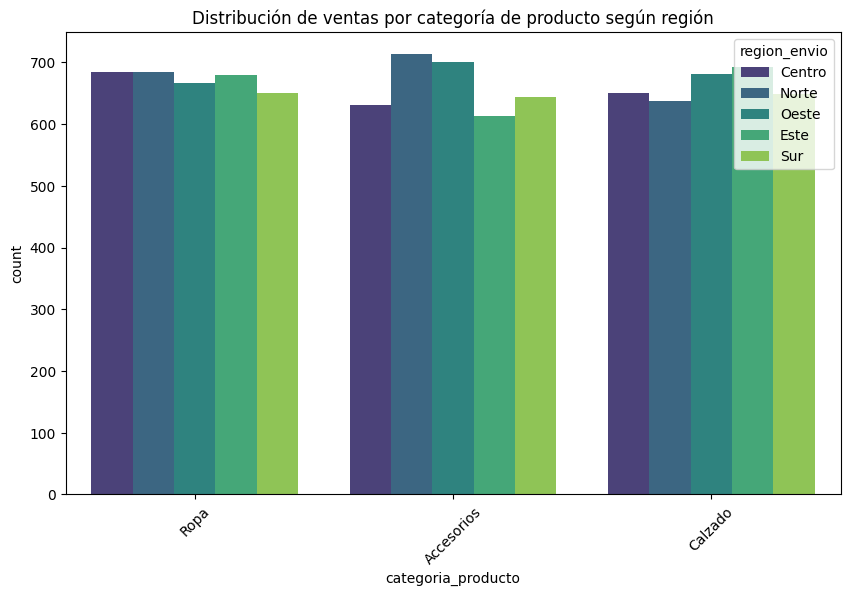

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizar la distribución de ventas por región de envío
plt.figure(figsize=(10, 6))
sns.countplot(x='categoria_producto', data=df, hue='region_envio', palette='viridis')
plt.title('Distribución de ventas por categoría de producto según región')
plt.xticks(rotation=45)
plt.show()
